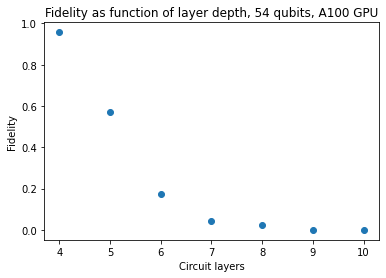

In [1]:
import matplotlib.pyplot as plt

x = [4, 5, 6, 7, 8, 9, 10]
y = [0.9575670475, 0.5713325996, 0.175331808416, 0.0416810454923, 0.0218893379850001, 0.00046356206142079, 5.837818619465E-06]

plt.scatter(x, y)
plt.title("Fidelity as function of layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel("Fidelity")
plt.show()

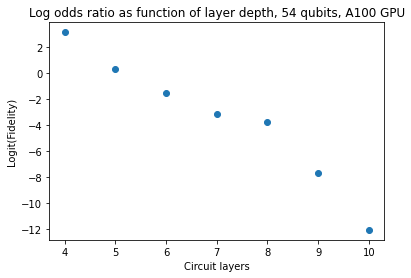

In [2]:
import numpy as np

yLog = np.log(y/(np.asarray([1-a for a in y])))

plt.scatter(x, yLog)
plt.title("Log odds ratio as function of layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel("Logit(Fidelity)")
plt.show()

<Figure size 1008x1008 with 0 Axes>

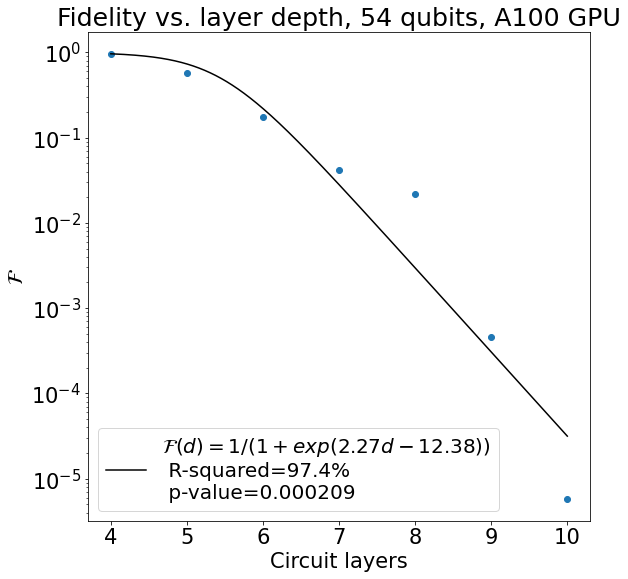

In [3]:
fig = plt.gcf()
fig.set_size_inches(14, 14)
plt.rc('legend',fontsize=20)
plt.rcParams.update({'font.size': 21})

fig, ax = plt.subplots(figsize = (9, 9))
plt.title("Fidelity vs. layer depth, 54 qubits, A100 GPU")
plt.xlabel("Circuit layers")
plt.ylabel(r"$\mathcal{F}$")
plt.yscale("log")

ax.scatter(x, y)

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, yLog)

t = np.asarray([4 + (a / 1024) for a in range(0, (10 - 4) * 1024)])

line = 1/(1 + np.exp(-(slope * np.array(t)+intercept)))
ax.plot(t, line, 'k', label="$\\mathcal{F}(d)=1/(1+exp(" + str(round(-slope, 2)) + "d-" + str(round(intercept, 2)) + "))$" + "\n R-squared={:.1f}% \n p-value={:.3}".format(-r_value * 100, p_value))
plt.legend()

fig.savefig('noisy_a100.png', dpi=100)

In [4]:
print("slope: ", slope)
print("intercept: ", intercept)
# Dependent and independent are intentionally anti-correlated by convention:
print("R-squared: ", -r_value)
print("p-value: ", p_value)

slope:  -2.2743203549557993
intercept:  12.376449392336163
R-squared:  0.9738868726003285
p-value:  0.00020868844949711778
